<a href="https://colab.research.google.com/github/aliyheva/MyDataScience/blob/main/Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import kagglehub

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("START-UMD/gtd")
print("Path to dataset files:", path)

100%|██████████| 28.7M/28.7M [00:01<00:00, 18.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/START-UMD/gtd/versions/3


In [ ]:
gtd=pd.read_csv(path+'/globalterrorismdb_0718dist.csv',encoding='latin-1')
gtd.head(10)

<ipython-input-5-71624384373a>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  gtd=pd.read_csv(path+'/globalterrorismdb_0718dist.csv',encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


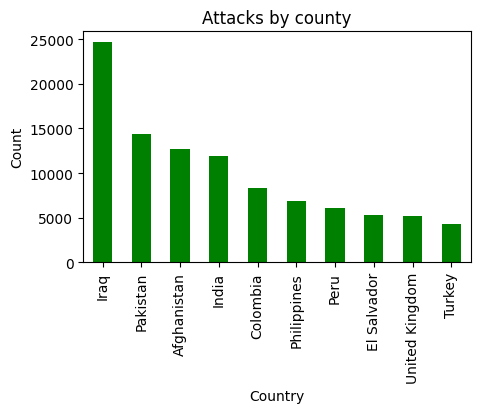

In [ ]:
#Task1:Attacks by country
plt.figure(figsize=(5,3))
v1=gtd['country_txt'].value_counts().plot(kind='bar',color='green')
xlabel=plt.xlabel('Country')
ylabel=plt.ylabel('Count')
title=plt.title('Attacks by county')

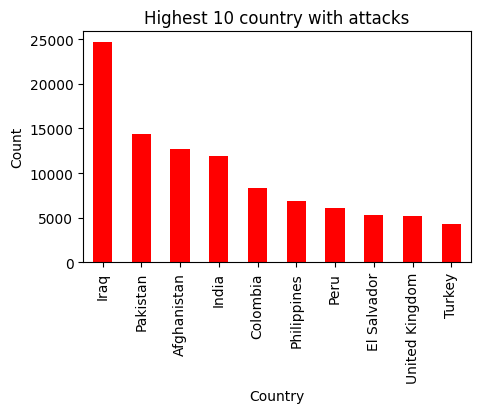

In [ ]:
#Task2:Top 10 country with highest attack frequency
plt.figure(figsize=(5,3))
v2=gtd['country_txt'].value_counts().head(10).plot(kind='bar',color='red')
xlabel=plt.xlabel('Country')
ylabel=plt.ylabel('Count')
title=plt.title('Highest 10 country with attacks')

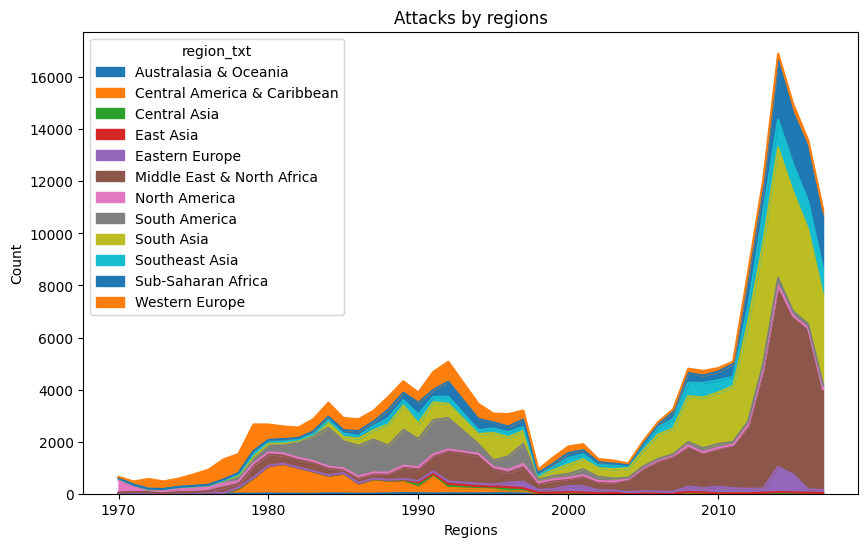

In [ ]:
#Task3:Region distribution
pd.crosstab(gtd.iyear, gtd.region_txt).plot(kind='area',figsize=(10,6))
xlabel=plt.xlabel('Regions')
ylabel=plt.ylabel('Count')
title=plt.title('Attacks by regions')

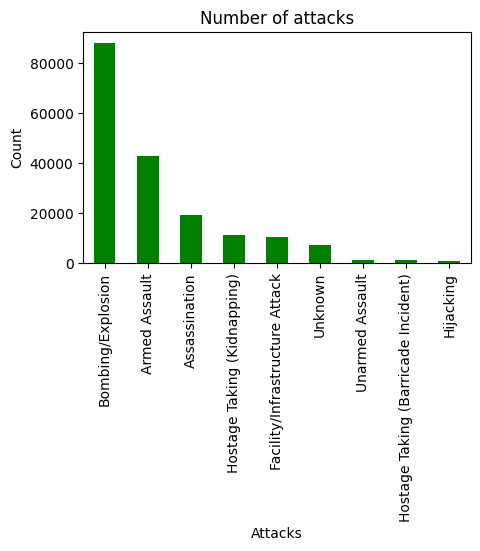

In [ ]:
#Task4:Attack type distribution
plt.figure(figsize=(5,3))
v4=gtd['attacktype1_txt'].value_counts().plot(kind='bar',color='green')
xlabel=plt.xlabel('Attacks')
ylabel=plt.ylabel('Count')
title=plt.title('Number of attacks')

In [ ]:
# # #Task5:Number of attacks over years
# plt.figure(figsize=(10,6))
# gtd.groupby('iyear')['eventid'].value_counts().plot(kind='bar',color='grey')
# plt.show()

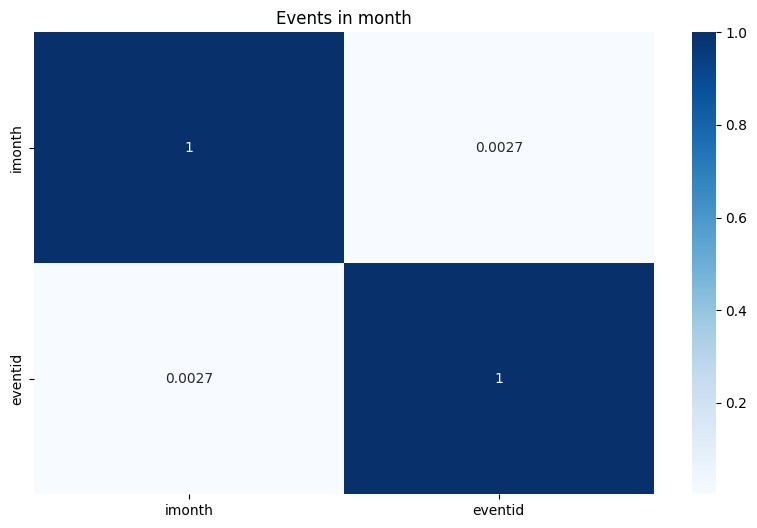

In [ ]:
#Task6:Region vs AttackType
import seaborn as sns
plt.figure(figsize=(10,6))
v6=gtd[['imonth','eventid']].corr()
title=plt.title('Events in month')
sns.heatmap(v6,annot=True,cmap='Blues');

Text(0, 0.5, 'Counts')

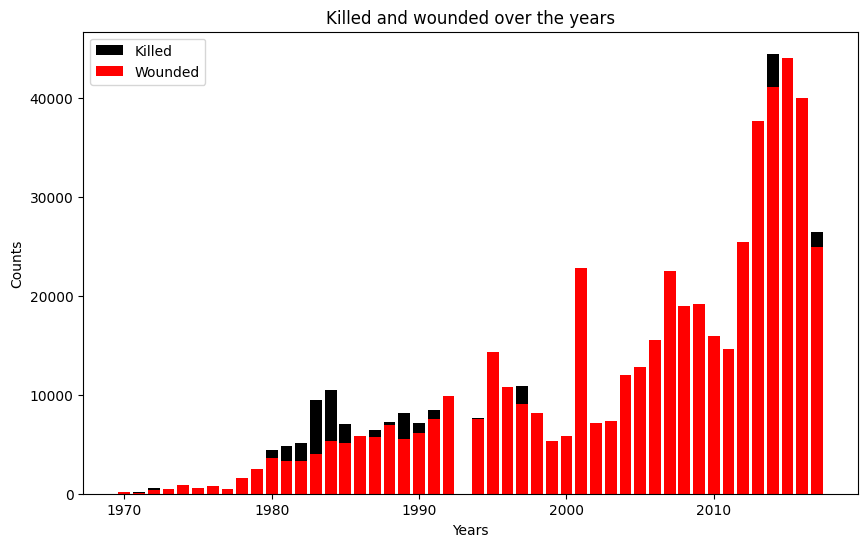

In [ ]:
#Task7:Numbers of killed and wounded over the years
plt.figure(figsize=(10,6))
v7=gtd.groupby('iyear')[['nkill','nwound']].sum()
plt.bar(v7.index,v7['nkill'],color='black',label='Killed')
plt.bar(v7.index,v7['nwound'],color='red',label='Wounded')
plt.legend()
plt.title('Killed and wounded over the years')
plt.xlabel('Years')
plt.ylabel('Counts')

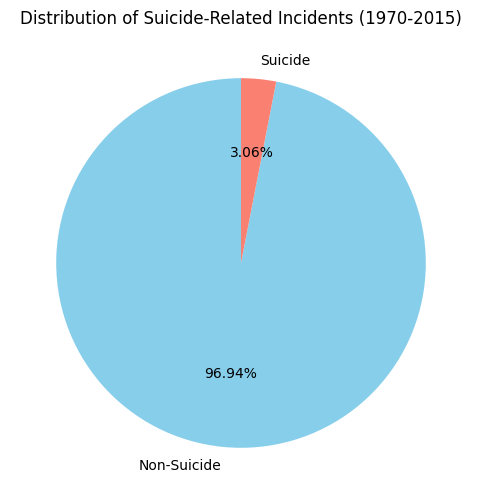

In [ ]:
#Task8:Distributions of suicide-related incidents
v8 = gtd[(gtd['iyear'] >= 1970) & (gtd['iyear'] <= 2015)]
v8 = v8[v8['suicide'].notna()]
suicide_counts = v8['suicide'].value_counts()
labels = ['Non-Suicide', 'Suicide']
plt.figure(figsize=(10, 6))
plt.pie(suicide_counts, labels=labels, autopct='%1.2f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Suicide-Related Incidents (1970-2015)')
plt.show()